In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading the dataset
df = pd.read_csv('/content/diabetes_data_upload.csv')
#showing first few rows of the dataset
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
#checking missing values per feature
df.isna().sum()

,0
Age,0
Gender,0
Polyuria,0
Polydipsia,0
sudden weight loss,0
weakness,0
Polyphagia,0
Genital thrush,0
visual blurring,0
Itching,0


**Exploratory Data Analysis**

<Axes: xlabel='class'>

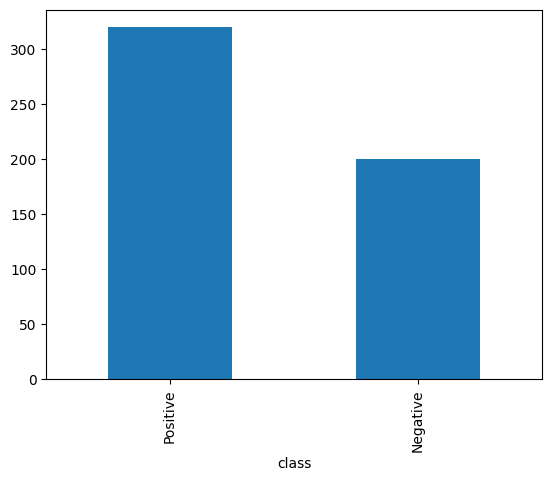

In [4]:
# plotting to create  bar plot distribution of target variable
df['class'].value_counts().plot(kind = 'bar')

In [5]:
# almost balanced dataset

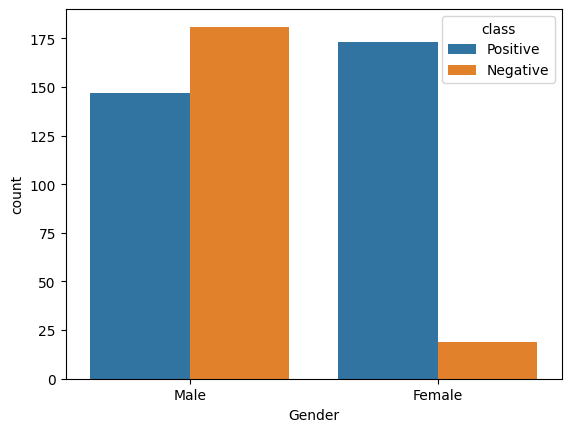

In [6]:
#Distribution of Gender
#plotting barchart for distribution
# Assuming 'Gender' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='Gender', hue='class', data=df)
plt.show()  # Display the plot

In [7]:
#Males have a higher distribution of negative diabetes in comparison to females

In [8]:
#Distribution of Polyuria

Distribution of Polyuria:Polyuria is a medical condition where adults have a very frequent passage of large volumes of urine




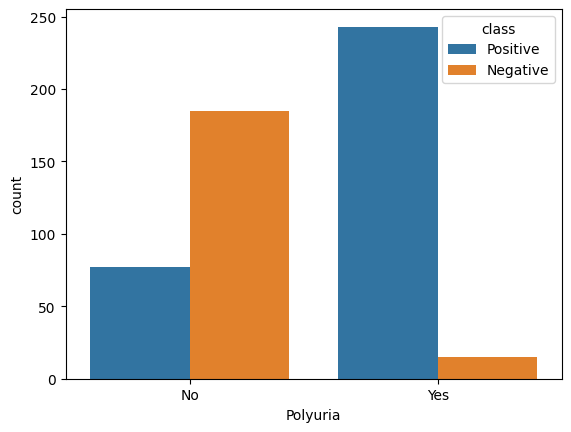

In [9]:
# Assuming 'Polyuria' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='Polyuria', hue='class', data=df)
plt.show()  # Display the plot

presence of Polyuria signifies strong chances of diabetes

Distribution of Polydipsia:Polydipsia is defined as a medical condition of being thirsty all the time.


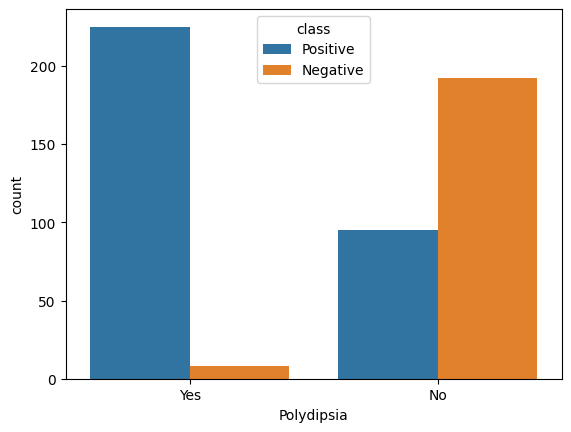

In [10]:
# Assuming 'Polydipsia' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='Polydipsia', hue='class', data=df)
plt.show()  # Display the plot

presence of Polydipsia signifies strong chances of diabetes

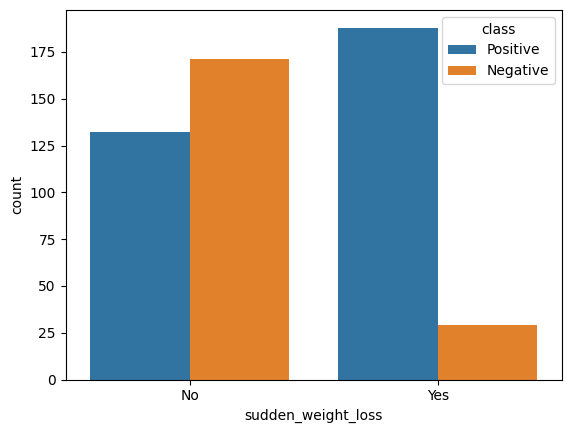

In [11]:

# Rename the column without spaces
df.rename(columns={'sudden weight loss': 'sudden_weight_loss'}, inplace=True)

# Plot the countplot
sns.countplot(x='sudden_weight_loss', hue='class', data=df)
plt.show()


patients having sudden weight loss are more prone to diabetes

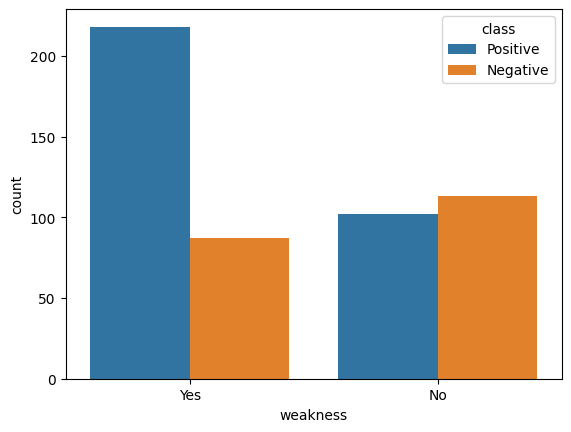

In [12]:

# Assuming 'weakness' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='weakness', hue='class', data=df)
plt.show()  # Display the plot


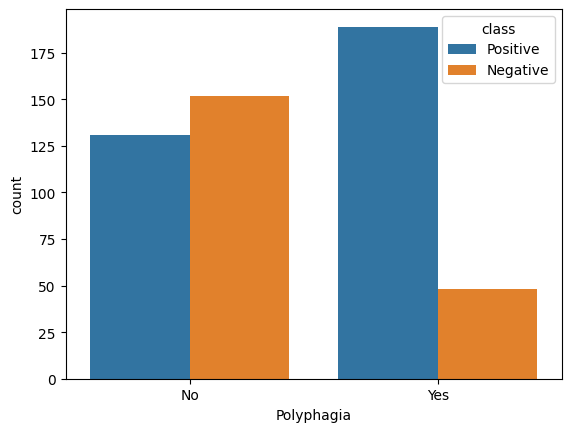

In [13]:
#Distribution of Polyphagia:Polyphagia is a medical condition of extreme hunger where hunger won’t go away even after eating more food
# Assuming 'Polyphagia' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='Polyphagia', hue='class', data=df)
plt.show()  # Display the plot




patients having polyphagia are more prone to diabetes

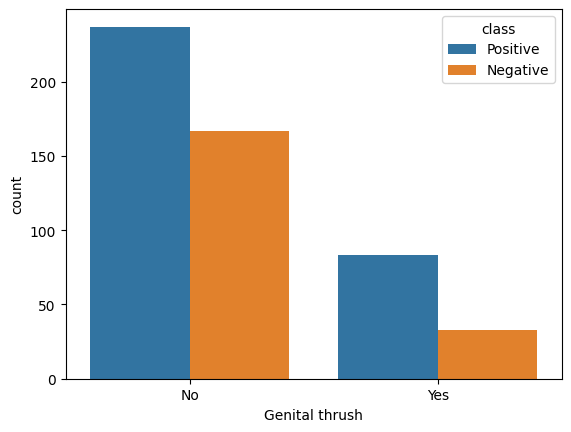

In [14]:
#Distribution of genital thrush: very painful and irritating medical condition in penis or vagina
# Assuming 'Genital thrush' and 'class' are columns in your DataFrame 'df'
sns.countplot(x='Genital thrush', hue='class', data=df)
plt.show()  # Display the plot



From above distribution it is unclear about correlation between diabetes and Genital Thrush

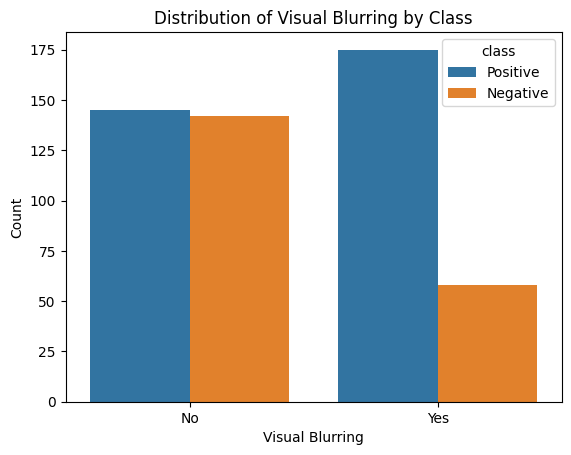

In [15]:
#Distribution of visual blurring:
sns.countplot(x='visual blurring', hue='class', data=df)

plt.title("Distribution of Visual Blurring by Class")
plt.xlabel("Visual Blurring")
plt.ylabel("Count")
plt.show()


From above distribution it is unclear about correlation between diabetes and visiual blur

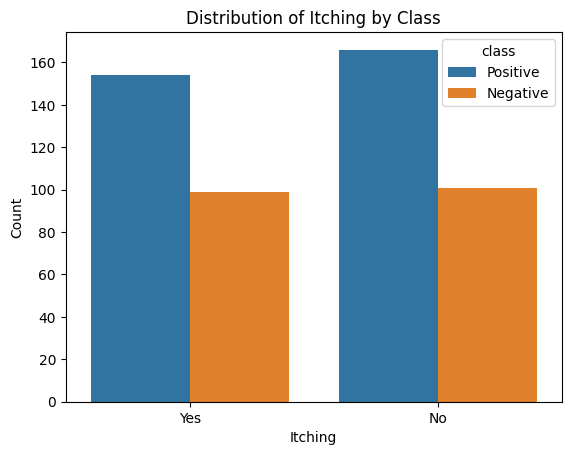

In [16]:
#Distribution of Itching
sns.countplot(x='Itching', hue='class', data=df)

plt.title("Distribution of Itching by Class")
plt.xlabel("Itching")
plt.ylabel("Count")
plt.show()

Itching is a common condition and it may or may not be a contributing factor

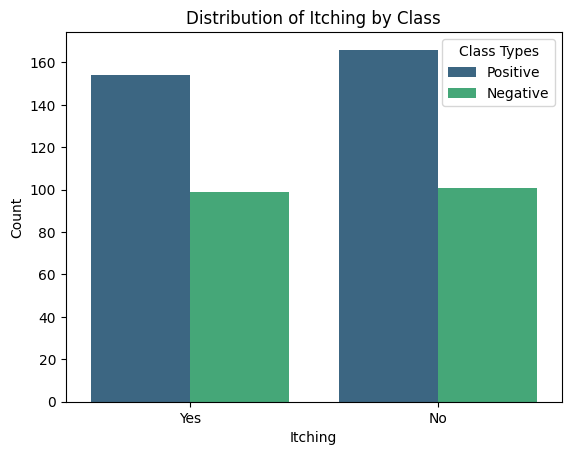

In [17]:
# Distribution of Irritability
sns.countplot(x='Itching', hue='class', data=df, palette='viridis')  # You can change 'viridis' to another palette
plt.title("Distribution of Itching by Class")
plt.xlabel("Itching")
plt.ylabel("Count")
plt.legend(title='Class Types')
plt.show()



Irritability is a common condition and it may or may not be a contributing factor

<Axes: xlabel='delayed healing', ylabel='count'>

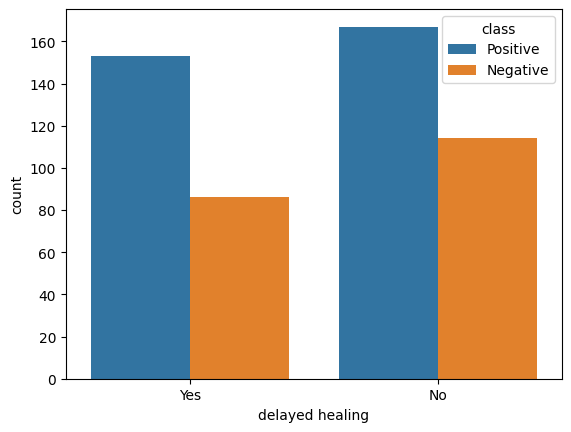

In [18]:
#Distribution of Delayed Healing
sns.countplot(x="delayed healing", hue="class", data=df)  # Specify column names clearly




Healing slowly may or may not be symptom of diabetes , however it along with other symptoms combined can be a symptom of diabetes

<Axes: xlabel='partial paresis', ylabel='count'>

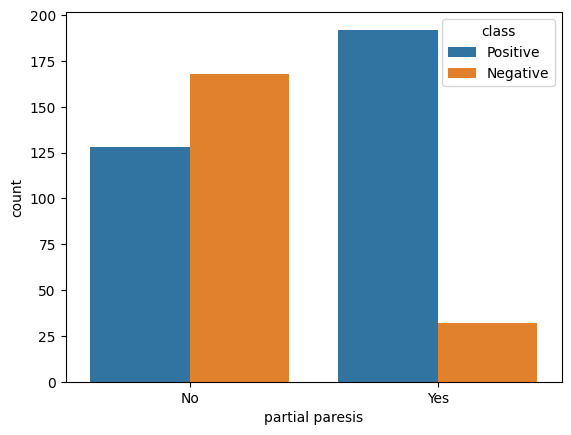

In [19]:
# Distribution of Partial Paresis:Paresis involves loosening the strength of a muscle or group of muscles
sns.countplot(x="partial paresis", hue="class", data=df)  # Specify column names clearly


The above distribution suggests that partial paresis is an important symptom in diabetes.

<Axes: xlabel='Obesity', ylabel='count'>

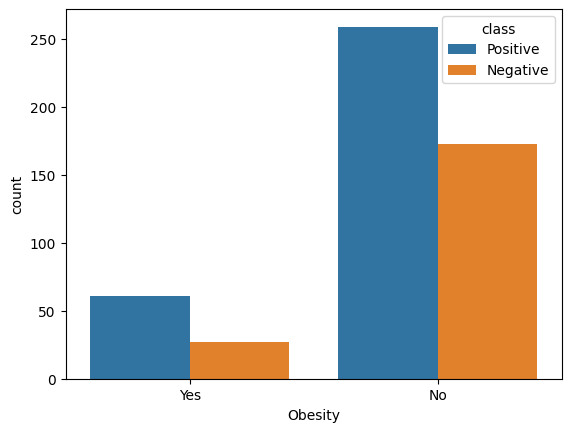

In [20]:
#Distribution of Obesity:
sns.countplot(x="Obesity", hue="class", data=df)


From the above distribution, it is evident that the dataset has very less obese patients but in general, we all know that obesity is more positively correlated with diabetes

<Axes: xlabel='Alopecia', ylabel='count'>

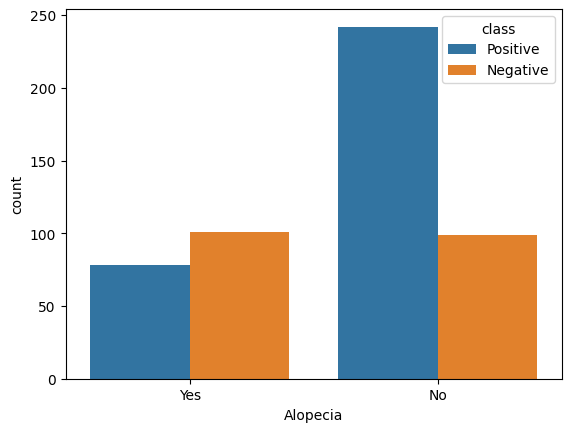

In [21]:
#Alopecia:Alopecia areata is a medical condition of sudden hair loss that starts with one or more circular bald patches
sns.countplot(x="Alopecia", hue="class", data=df)


from above  distribution no corrilation can be obtained between Alopecia and Diabetes

Data Pre-processing



In [22]:
# transforming target column from string to numeric format
df['class'] = df['class'].map({'Positive':1,'Negative':0})

In [23]:
df['class'].unique() # changes applied

array([1, 0])

In [24]:
# Splitting Dependent and Indeoendent Variables
X= df.drop(['class'],axis=1)
y=df['class']

In [25]:
# converting categorical variables into numeric using label encoding

#creating a list of object datatypes
objList = X.select_dtypes(include = "object").columns


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))
print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [27]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [28]:
# all feattures are now numeric

In [29]:
#Correlation

# Correlation of dependent variables with independent variables
X.corrwith(y)

,0
Age,0.108679
Gender,-0.449233
Polyuria,0.665922
Polydipsia,0.648734
sudden_weight_loss,0.436568
weakness,0.243275
Polyphagia,0.342504
Genital thrush,0.110288
visual blurring,0.251300
Itching,-0.013384


polyuria and Polydipsia are the most positively correlated features whereas Gender and Alopecia are the negatively correlated features

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 52)

#Data Normalization
# In given dataset age feature is inconsistent with respect to other features, thus we will normalize it into same scale using minmax scaler




In [32]:
# instantiating minmax scaling object
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
#apply minmax scaling on Age feature
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [33]:
X_train.head(2)

,Age,Gender,Polyuria,Polydipsia,sudden_weight_loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
335,0.500000,1,0,0,0,1,1,0,1,1,0,1,1,1,1,0
11,0.297297,1,1,1,0,0,1,1,0,1,0,1,0,1,0,0


In [34]:
#Model Building

# first lets check with most basic Logistic Regression

from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(random_state = 0, penalty = 'l2') # l1 signifies ridge regression
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [35]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score

In [36]:
#Model Evaluation
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)
results = pd.DataFrame([['Logistic Regression',acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.903846,0.897059,0.953125,0.924242,0.889062


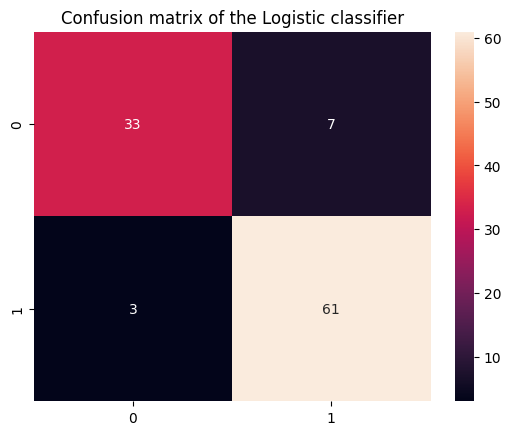

In [37]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True)
plt.show()

In [38]:
# Feature Importance
feature_importance = abs(logi.coef_[0])
feature_importance


array([0.73383816, 2.65271387, 2.86775977, 2.64112047, 0.69569124,
       0.45934836, 0.59801324, 0.96236373, 0.24255132, 0.96371534,
       1.44637945, 0.49644393, 0.6192999 , 0.57997497, 0.4151192 ,
       0.29220393])

In [39]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [40]:
features = pd.DataFrame([feature_importance],
               columns = X.columns)

In [41]:
features.loc[0].sort_values(ascending=False)

,0
Polyuria,2.867760
Gender,2.652714
Polydipsia,2.641120
Irritability,1.446379
Itching,0.963715
Genital thrush,0.962364
Age,0.733838
sudden_weight_loss,0.695691
partial paresis,0.619300
Polyphagia,0.598013


So, based on the table, the top 5 most contributing features of the logistic regression model are  Polyuria, Gender, Polydipsia Itching, and Irritability.

In [42]:
# Lets Check with random forest model now
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Naive Bayes Model Evaluation
y_predict_nb = nb.predict(X_test)
roc_nb = roc_auc_score(y_test, y_predict_nb)
acc_nb = accuracy_score(y_test, y_predict_nb)
prec_nb = precision_score(y_test, y_predict_nb)
rec_nb = recall_score(y_test, y_predict_nb)
f1_nb = f1_score(y_test, y_predict_nb)

# Updating Results Table for Naive Bayes
model_results_nb = pd.DataFrame([['Naive Bayes', acc_nb, prec_nb, rec_nb, f1_nb, roc_nb]],
                                 columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])

model_results_nb



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Naive Bayes,0.875,0.892308,0.90625,0.899225,0.865625


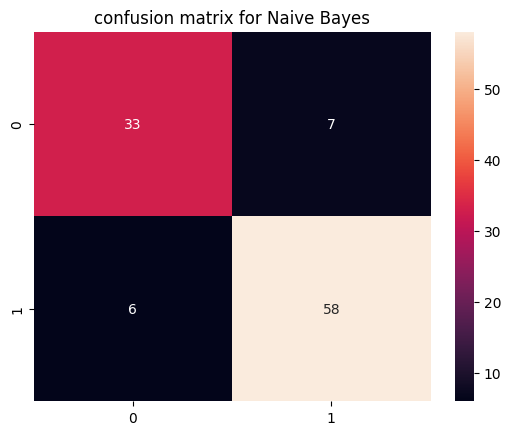

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Naive Bayes,0.875,0.892308,0.90625,0.899225,0.865625


In [44]:
cm_model_results_nb= confusion_matrix(y_test, y_predict_nb)
plt.title('confusion matrix for Naive Bayes')
sns.heatmap(cm_model_results_nb,annot=True)
plt.show()
model_results_nb

In [45]:
#RANDOM FOREST
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)
model_results = pd.DataFrame([['Random Forest (Untuned)',acc, prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = pd.concat([results, model_results], ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest (Untuned),0.971154,0.984127,0.96875,0.976378,0.971875


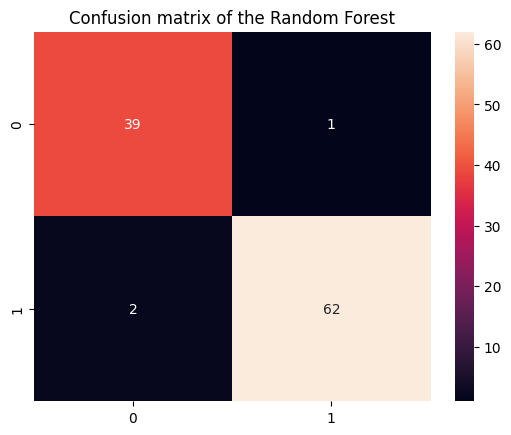

In [46]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest')
sns.heatmap(cm_rf,annot=True)
plt.show()

In [47]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)

,0
Polyuria,0.225515
Polydipsia,0.200878
Gender,0.103970
Age,0.092926
sudden_weight_loss,0.051404
partial paresis,0.051214
Irritability,0.047610
Alopecia,0.042179
delayed healing,0.031757
visual blurring,0.026966


Based on the above feature importance table the top 5 features are Polydipsia, Polyuria, Age, Gender, and sudden weight loss.

In [48]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_predict_knn = knn.predict(X_test)

# Calculate evaluation metrics
roc_knn = roc_auc_score(y_test, y_predict_knn)
acc_knn = accuracy_score(y_test, y_predict_knn)
prec_knn = precision_score(y_test, y_predict_knn)
rec_knn = recall_score(y_test, y_predict_knn)
f1_knn = f1_score(y_test, y_predict_knn)

# Update results table with KNN model evaluation
model_results_knn = pd.DataFrame([['K-Nearest Neighbors', acc_knn, prec_knn, rec_knn, f1_knn, roc_knn]],
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
model_results_knn



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbors,0.942308,0.967742,0.9375,0.952381,0.94375


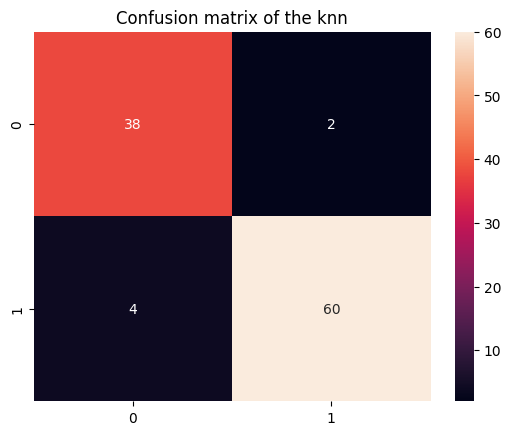

In [49]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
plt.title('Confusion matrix of the knn')
sns.heatmap(cm_knn,annot=True)
plt.show()

In [50]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train, X_test, y_train, and y_test are loaded
# (Replace with your actual data loading or creation code)

# Create a function to evaluate KNN performance with a feature excluded
def evaluate_knn_with_feature_excluded(X_train, X_test, y_train, y_test, feature_to_exclude):
    X_train_temp = X_train.drop(feature_to_exclude, axis=1)  # Exclude the feature
    knn = KNeighborsClassifier()
    knn.fit(X_train_temp, y_train)
    y_pred = knn.predict(X_test.drop(feature_to_exclude, axis=1))  # Exclude feature in test data
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Explore feature importance through exclusion
feature_importances_knn = {}
for feature in X_train.columns:
    original_accuracy = accuracy_score(y_test, KNeighborsClassifier().fit(X_train, y_train).predict(X_test))
    excluded_accuracy = evaluate_knn_with_feature_excluded(X_train, X_test, y_train, y_test, feature)
    importance = original_accuracy - excluded_accuracy
    feature_importances_knn[feature] = importance

# Print or visualize feature importances
print(feature_importances_knn)  # Example output: {'feature1': 0.05, 'feature2': 0.12, ...}


{'Age': 0.0, 'Gender': -0.009615384615384581, 'Polyuria': 0.04807692307692302, 'Polydipsia': 0.038461538461538436, 'sudden_weight_loss': 0.0, 'weakness': 0.009615384615384581, 'Polyphagia': 0.028846153846153855, 'Genital thrush': 0.019230769230769162, 'visual blurring': 0.009615384615384581, 'Itching': 0.0, 'Irritability': 0.028846153846153855, 'delayed healing': 0.009615384615384581, 'partial paresis': 0.028846153846153855, 'muscle stiffness': 0.009615384615384581, 'Alopecia': 0.0, 'Obesity': 0.0}


In [51]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [52]:
features_1= pd.DataFrame([feature_importances_knn],
               columns = X.columns)

In [53]:
features_1.loc[0].sort_values(ascending=False)

,0
Polyuria,0.048077
Polydipsia,0.038462
Polyphagia,0.028846
Irritability,0.028846
partial paresis,0.028846
Genital thrush,0.019231
weakness,0.009615
visual blurring,0.009615
delayed healing,0.009615
muscle stiffness,0.009615


In [54]:
# for SVM
from sklearn.svm import SVC

# Initialize and train SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions
y_predict_svm = svm.predict(X_test)

# Calculate evaluation metrics
roc_svm = roc_auc_score(y_test, y_predict_svm)
acc_svm = accuracy_score(y_test, y_predict_svm)
prec_svm = precision_score(y_test, y_predict_svm)
rec_svm = recall_score(y_test, y_predict_svm)
f1_svm = f1_score(y_test, y_predict_svm)

# Update results table with SVM model evaluation
model_results_svm = pd.DataFrame([['SVM', acc_svm, prec_svm, rec_svm, f1_svm, roc_svm]],
                                  columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC'])
# ... your code for calculating SVM model metrics (accuracy, precision, etc.)

# Assuming model_results_svm is a DataFrame containing SVM results
results = pd.concat([results, model_results_svm], ignore_index=True)

model_results_svm

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,SVM,0.913462,0.910448,0.953125,0.931298,0.901563


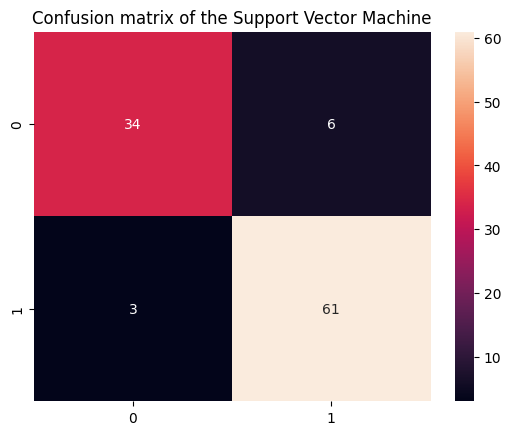

In [55]:
cm_svm = confusion_matrix(y_test, y_predict_svm)
plt.title('Confusion matrix of the Support Vector Machine')
sns.heatmap(cm_svm,annot=True)
plt.show()

In [56]:
from sklearn.inspection import permutation_importance

# Assuming svm is a trained SVM model and X_test is your test data
svm_importance = permutation_importance(svm, X_test, y_test, n_repeats=30, random_state=42)

# Get feature importance scores
feature_importance_svm = svm_importance.importances_mean

# Display feature importance in the SVM model
print("Feature Importance in SVM (Permutation Importance):")
print(feature_importance_svm)

Feature Importance in SVM (Permutation Importance):
[-0.00865385  0.11346154  0.13333333  0.11025641 -0.00769231 -0.01089744
 -0.00480769 -0.00480769 -0.00544872  0.01025641  0.00288462 -0.00288462
 -0.00160256 -0.00705128  0.00576923 -0.01634615]


In [57]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden_weight_loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [58]:
features_2= pd.DataFrame([feature_importance_svm],
               columns = X.columns)

In [59]:
features_2.loc[0].sort_values(ascending=False)

,0
Polyuria,0.133333
Gender,0.113462
Polydipsia,0.110256
Itching,0.010256
Alopecia,0.005769
Irritability,0.002885
partial paresis,-0.001603
delayed healing,-0.002885
Genital thrush,-0.004808
Polyphagia,-0.004808
